In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


load data

In [113]:
df=pd.read_csv("insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [114]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [116]:
#checking for any duplicate values
df.duplicated().any()

True

In [117]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [118]:
df1=df.drop_duplicates()

In [119]:
df1.shape

(1337, 7)

In [120]:
df1.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [121]:
#statistical measure of columns
df1.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [122]:
df1.describe(exclude="number")

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [123]:
df1['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [124]:
df1['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [125]:
df1['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

<Axes: xlabel='children'>

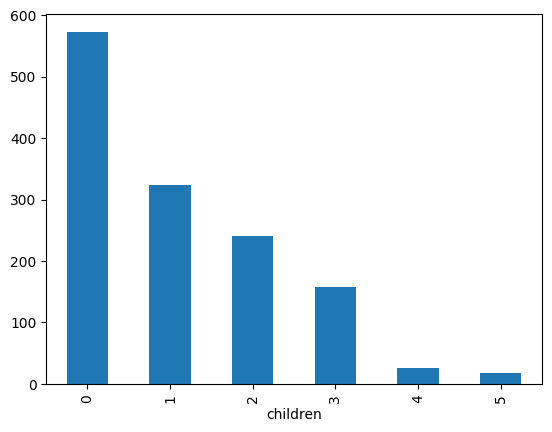

In [126]:
#histogram representation
df1['children'].value_counts().plot(kind = 'bar')

<Axes: xlabel='smoker'>

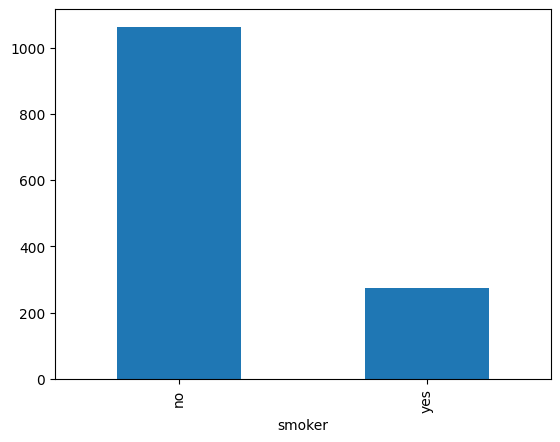

In [127]:
df1['smoker'].value_counts().plot(kind = 'bar')

<Axes: xlabel='region'>

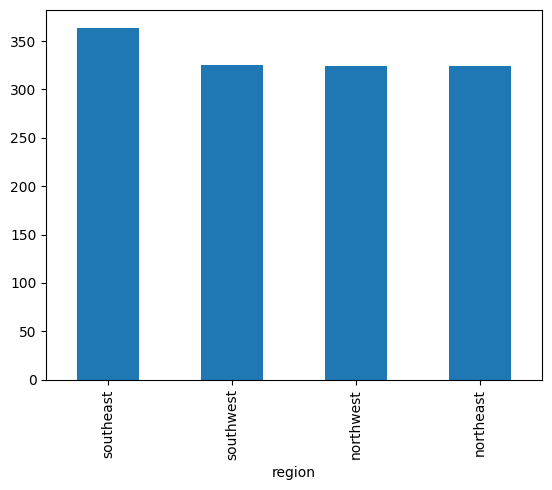

In [128]:
df1['region'].value_counts().plot(kind = 'bar')

<Axes: xlabel='sex'>

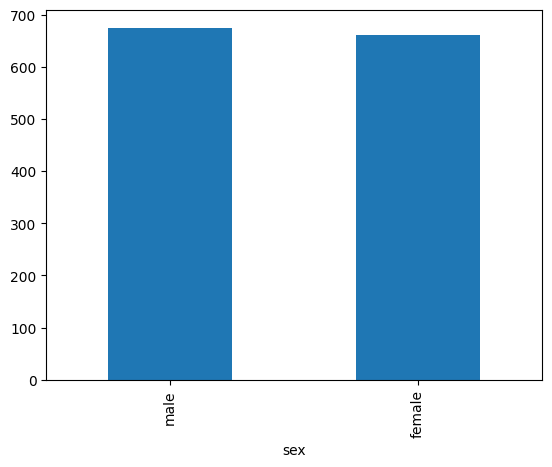

In [129]:
df1['sex'].value_counts().plot(kind = 'bar')

In [130]:
region_count=df1["region"].value_counts()
region_count

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

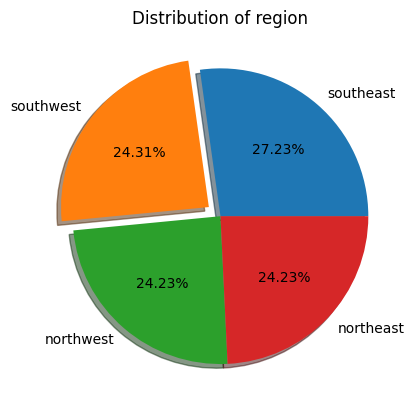

In [131]:
plt.pie(labels=region_count.index,
        x=region_count.values,
        shadow=True,
        autopct='%.2f%%',
         explode=(0,0.1,0,0))
plt.title("Distribution of region")
plt.show()

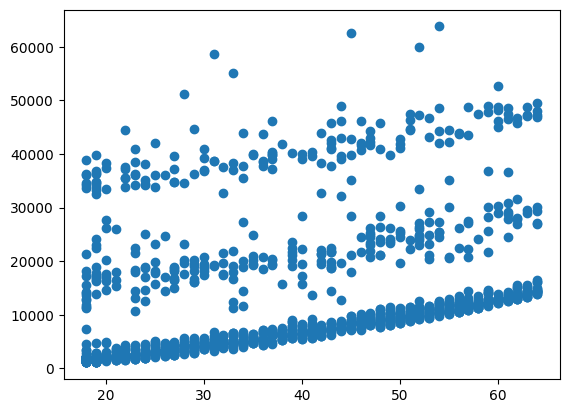

In [132]:
#scatter plot :
plt.scatter(data = df1, x = 'age' , y = 'charges')

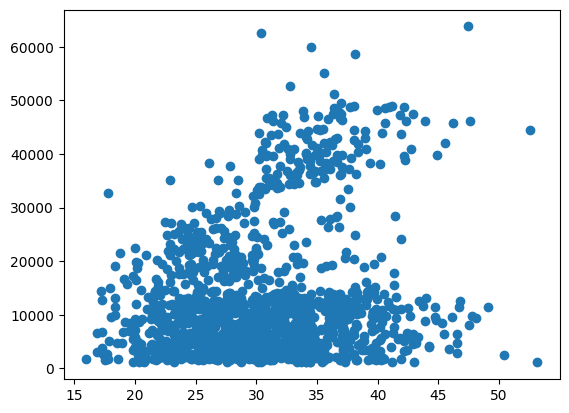

In [133]:
plt.scatter(data = df1, x = 'bmi' , y = 'charges')

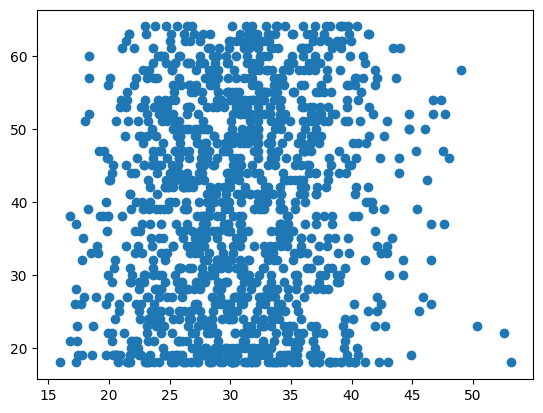

In [134]:
plt.scatter(data = df1, x = 'bmi' , y = 'age')

In [135]:
#insurance cost for smoker and non smoker:
smoker_df = df1.groupby("smoker")["charges"].mean().reset_index()
smoker_df

,smoker,charges
0,no,8440.660307
1,yes,32050.231832


<Axes: xlabel='smoker'>

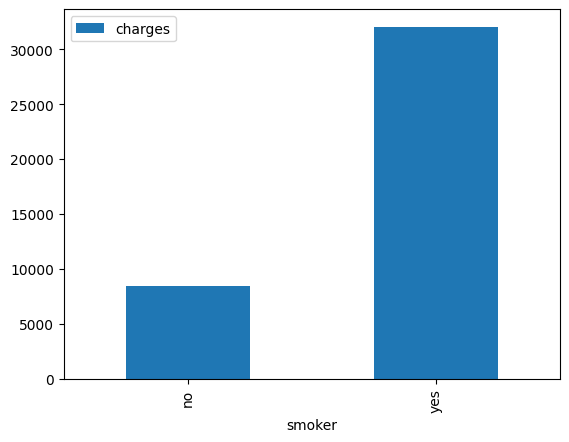

In [136]:
smoker_df.plot(kind='bar' , x = 'smoker' , y = 'charges')

In [137]:
#insurance cost for male and female:
gender_df = df1.groupby("sex")["charges"].mean().reset_index()
gender_df

,sex,charges
0,female,12569.578844
1,male,13974.998864


<Axes: xlabel='sex'>

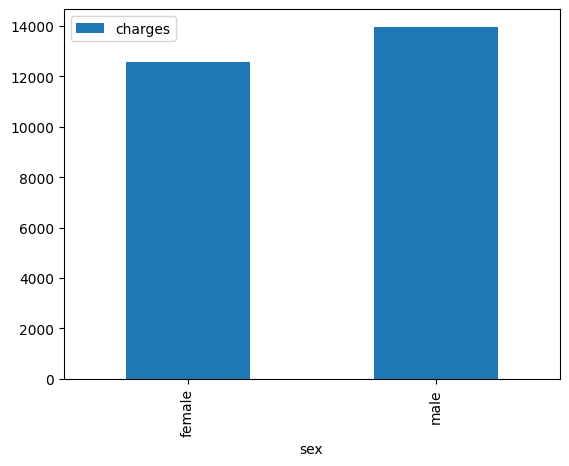

In [138]:
gender_df.plot(kind='bar' , x = 'sex' , y = 'charges')

In [139]:
# Machine Learning Models Development


# label Encoding


from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()


In [140]:
df1['sex'] = le.fit_transform(df1['sex'])
df1['smoker'] = le.fit_transform(df1['smoker'])
df1['region'] = le.fit_transform(df1['region'])


/tmp/ipykernel_2809/1053145905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sex'] = le.fit_transform(df1['sex'])
/tmp/ipykernel_2809/1053145905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['smoker'] = le.fit_transform(df1['smoker'])
/tmp/ipykernel_2809/1053145905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [141]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [142]:
#X - Independent Variable
#Y - Dependent Variable


x = df1.drop(columns=["charges"] , axis=1)
y = df1["charges"]

In [143]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [144]:
# spliting the data into training and testing 
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)
print(f"the shape of x trian : {x_train.shape}")  
print(f"the shape of y trian : {y_train.shape}")  

print("*"*30)

print(f"the shape of x test : {x_test.shape}")  
print(f"the shape of y test : {y_test.shape}")  


the shape of x trian : (1069, 6)
the shape of y trian : (1069,)
******************************
the shape of x test : (268, 6)
the shape of y test : (268,)


In [145]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [146]:
# feature scalling 
from sklearn.preprocessing import StandardScaler
std_scalar = StandardScaler()

x['age'] = std_scalar.fit_transform(np.array(x['age']).reshape(-1,1))
x['bmi'] = std_scalar.fit_transform(np.array(x['bmi']).reshape(-1,1))
x['children'] = std_scalar.fit_transform(np.array(x['children']).reshape(-1,1))

x


,age,sex,bmi,children,smoker,region
0,-1.440418,0,-0.453160,-0.909234,1,3
1,-1.511647,1,0.509422,-0.079442,0,2
2,-0.799350,1,0.383155,1.580143,0,2
3,-0.443201,1,-1.305052,-0.909234,0,1
4,-0.514431,1,-0.292456,-0.909234,0,1
...,...,...,...,...,...,...
1333,0.767704,1,0.050269,1.580143,0,1
1334,-1.511647,0,0.206053,-0.909234,0,0
1335,-1.511647,0,1.014490,-0.909234,0,2
1336,-1.297958,0,-0.797524,-0.909234,0,3


In [147]:
## developing linear Regression Model
from sklearn.linear_model import LinearRegression
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train,y_train)

LinearRegression()

In [148]:
##cross validation

from sklearn.model_selection import cross_val_score , cross_validate
result = cross_validate(linear_reg_model ,x, y ,cv=5 ,return_train_score=True , scoring='r2')
result

{'fit_time': array([0.00287724, 0.00241566, 0.00234914, 0.00203443, 0.00194407]),
 'score_time': array([0.00149441, 0.0017786 , 0.00114799, 0.00158405, 0.00145817]),
 'test_score': array([0.76123487, 0.70840689, 0.77720769, 0.73365562, 0.7551376 ]),
 'train_score': array([0.74737531, 0.75930033, 0.74326474, 0.75468466, 0.74915469])}

In [149]:
train_acc = result['train_score'].mean() * 100
print(' Training Accuracy = ',round(train_acc,2),'%')


 Training Accuracy =  75.08 %


In [150]:
test_acc = result['train_score'].mean() * 100
print(' Tresting Accuracy = ',round(test_acc,2),'%')

 Tresting Accuracy =  75.08 %


In [151]:
## Multiple Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [152]:
models = []
models.append(("LinearRegression",LinearRegression()))
models.append(("Knn",KNeighborsRegressor()))
models.append(("Decision Tree", DecisionTreeRegressor()))
models.append(("Random Forest",RandomForestRegressor()))
for model in models:
    result = cross_validate(model[1],x,y,cv=5,return_train_score= True ,scoring='r2')
    print(model[0])
    train_acc = round((result["train_score"].mean())*100 ,2)
    test_acc =round((result["test_score"].mean()) * 100 ,2)
    print(f'Train R2 score : {train_acc}')
    print(f'Test R2 score : {test_acc}')
    print('\n')

LinearRegression
Train R2 score : 75.08
Test R2 score : 74.71


Knn
Train R2 score : 81.45
Test R2 score : 68.86


Decision Tree
Train R2 score : 99.9
Test R2 score : 70.91




Random Forest
Train R2 score : 97.63
Test R2 score : 83.55




In [153]:
## Random forest hyperparameter tuning using randomsearch
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV

params = {
    'n_estimators' : [100 ,200 ,300], #number of trees in random forest
    'max_depth' : [None ,5 ,10], # maximum number of levels in tree 
    'min_samples_split' : [2,5,10],# minimum no of sampels required to slpit a node
    'min_samples_leaf' : [1,2,4],  # minimum no of samples required at each leaf node
    'bootstrap' : [ True , False] # method of selecting samples for training each tree 

}

    ## Tunning using random search ....
random_search = RandomizedSearchCV( 
        param_distributions=params,
        estimator= RandomForestRegressor(),
        cv=5,
        return_train_score= True ,
        scoring='r2',
        n_jobs= -1
    )


In [154]:
random_search.fit(x,y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   return_train_score=True, scoring='r2')

In [155]:
random_search.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 5,
 'bootstrap': True}

In [156]:
random_search.cv_results_['mean_train_score'].mean() * 100 

92.40117733962538

In [157]:
random_search.cv_results_['mean_test_score'].mean() * 100 

83.0330530567894

In [158]:
RF= RandomForestRegressor(n_estimators =100 ,
                          min_samples_split= 5 ,
                           min_samples_leaf=2,
                            max_depth=5,
                            bootstrap= True )


In [159]:
RF.fit(x_train ,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=5)

In [160]:
from sklearn.metrics import r2_score
predicted_train_data = RF.predict(x_train)
train_score = r2_score(y_true=y_train , y_pred = predicted_train_data)
predicted_test_data = RF.predict(x_test)
test_score =r2_score(y_true=y_test , y_pred=predicted_test_data)
print(f"R-squared (R^2) for  training data using Random Forest :  {round(train_score ,2 )*100} %" )
print(f"R-squared (R^2) for  testing data using Random Forest :  {round(test_score ,2 )*100} %" )

R-squared (R^2) for  training data using Random Forest :  88.0 %
R-squared (R^2) for  testing data using Random Forest :  90.0 %


In [161]:
#customised predictions
age = 24
sex = 1
bmi = 35 
Children = 3
smoker = 1
region = 3

In [162]:
age1= std_scalar.transform([[24]])
bmi1= std_scalar.transform([[35]])
Children1 = std_scalar.transform([[3]])
age1[0][0]
bmi1[0][0]
Children1[0][0]

1.5801434662483465

In [163]:
print(age1)

[[19.00578687]]


In [164]:
print(bmi1)

[[28.13350484]]


In [165]:
print(RF.predict([[age1[0][0],sex ,bmi1[0][0] , Children1[0][0],smoker , region]]))

[17882.11653504]


/home/vpawan19/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
